## AutoRegression

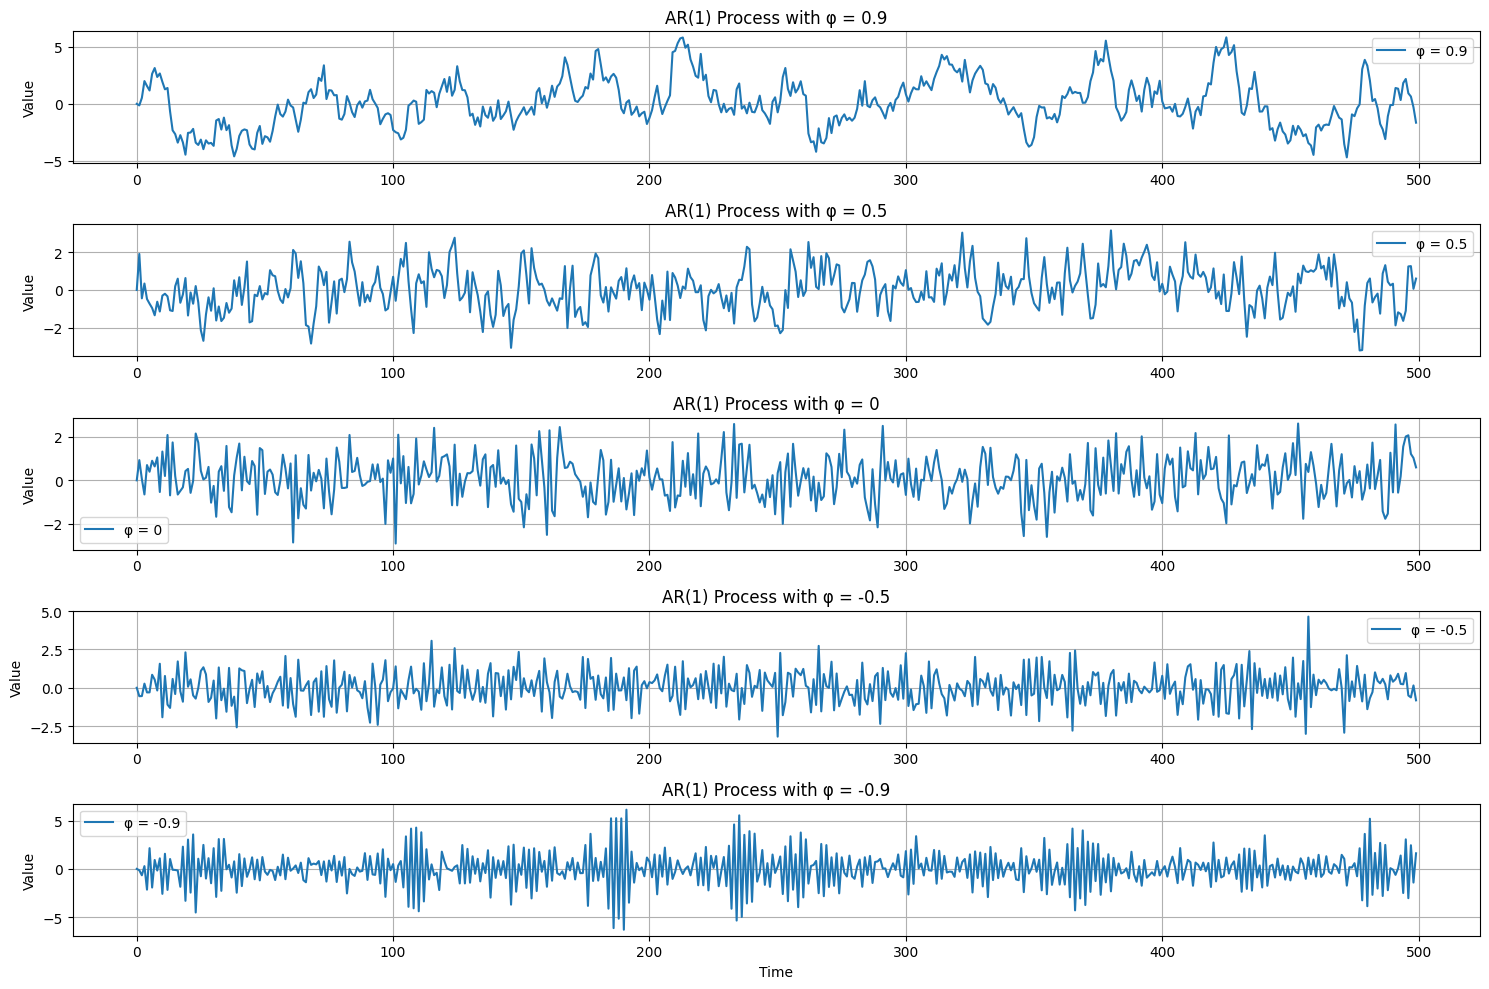

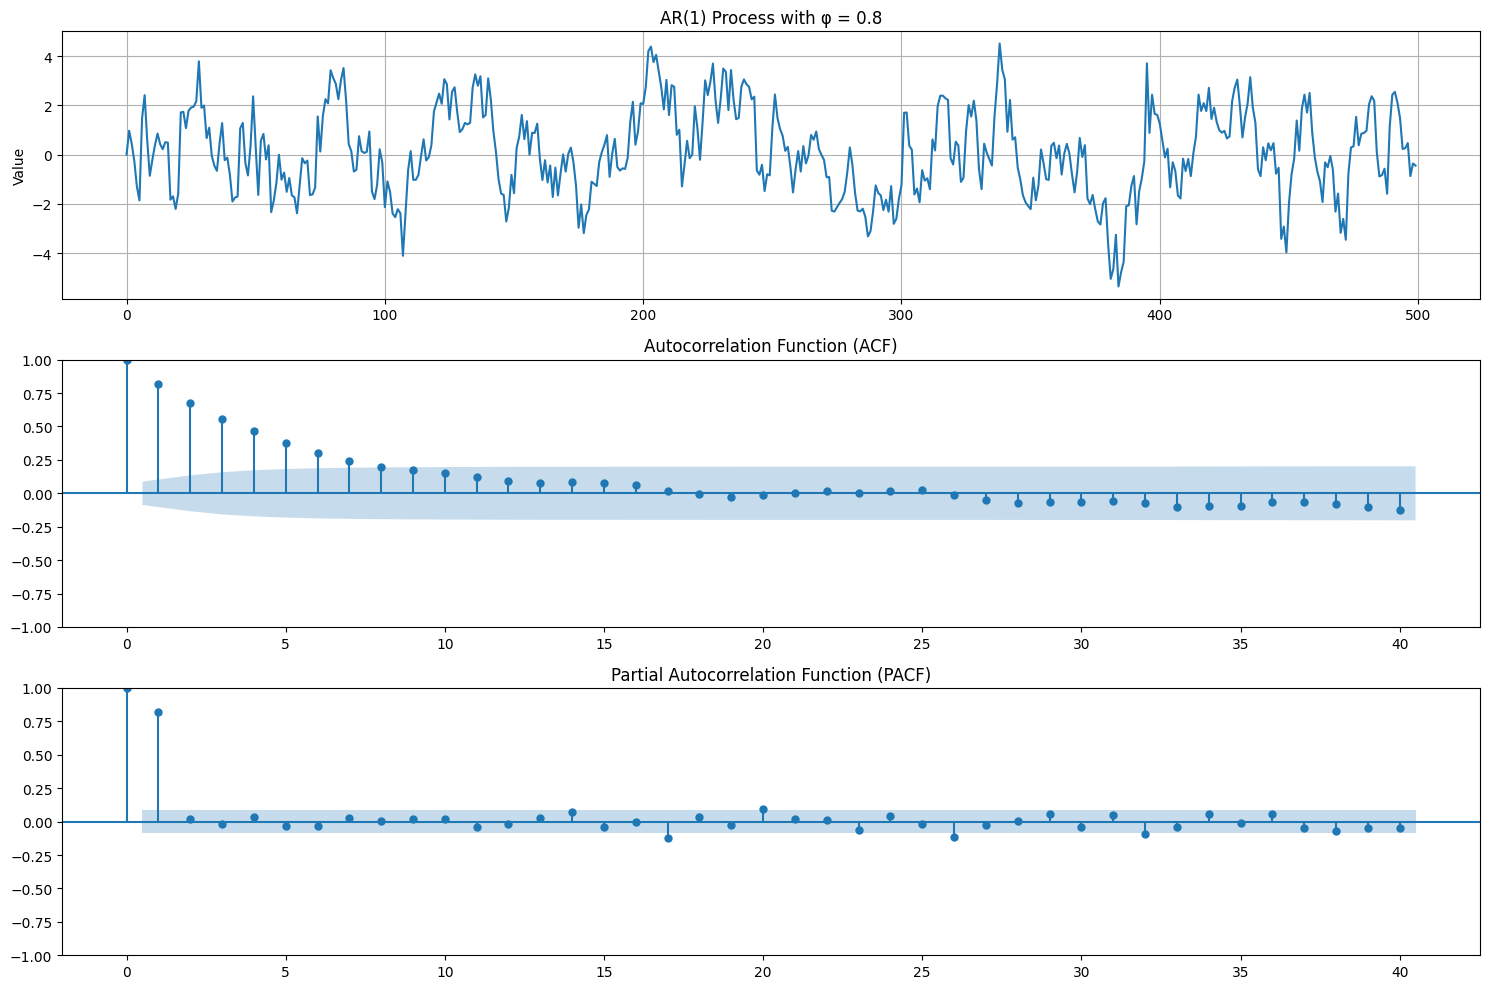

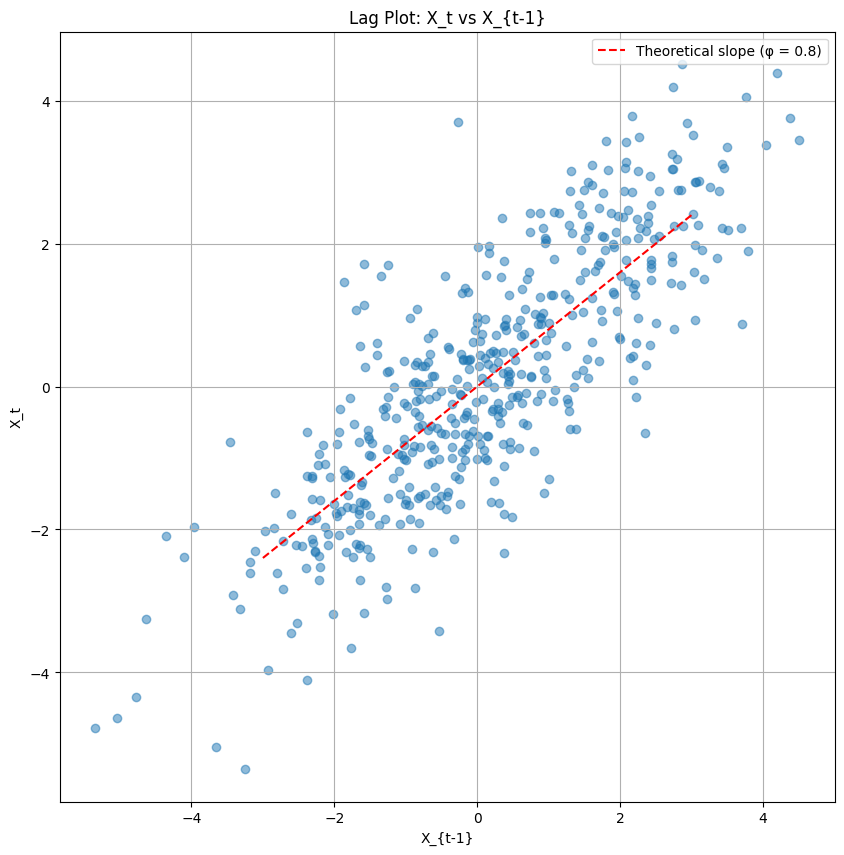

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def generate_ar1(phi, n_points=1000, sigma=1.0, initial_value=0):
    """
    Generate an AR(1) process: X_t = phi * X_{t-1} + epsilon_t
    
    Parameters:
    -----------
    phi : float
        The AR coefficient (-1 < phi < 1 for stationarity)
    n_points : int
        Number of points to generate
    sigma : float
        Standard deviation of the noise term
    initial_value : float
        Starting value for the process
    
    Returns:
    --------
    numpy.array
        The generated AR(1) process
    """
    # Initialize array with zeros
    x = np.zeros(n_points)
    x[0] = initial_value
    
    # Generate random noise
    epsilon = np.random.normal(0, sigma, n_points)
    
    # Generate AR(1) process
    for t in range(1, n_points):
        x[t] = phi * x[t-1] + epsilon[t]
    
    return x

# Generate AR(1) processes with different phi values
phis = [0.9, 0.5, 0, -0.5, -0.9]
n_points = 500

# Create figure for time series plots
plt.figure(figsize=(15, 10))

for i, phi in enumerate(phis):
    # Generate AR(1) process
    ar_process = generate_ar1(phi, n_points)
    
    # Plot time series
    plt.subplot(len(phis), 1, i+1)
    plt.plot(ar_process, label=f'φ = {phi}')
    plt.title(f'AR(1) Process with φ = {phi}')
    plt.ylabel('Value')
    if i == len(phis)-1:
        plt.xlabel('Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Now let's analyze one AR(1) process in detail
phi = 0.8
ar_process = generate_ar1(phi, n_points)

# Create figure for detailed analysis
fig = plt.figure(figsize=(15, 10))

# Plot time series
plt.subplot(311)
plt.plot(ar_process)
plt.title(f'AR(1) Process with φ = {phi}')
plt.ylabel('Value')
plt.grid(True)

# Plot ACF
plt.subplot(312)
plot_acf(ar_process, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(313)
plot_pacf(ar_process, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Create a scatter plot to show the relationship between X_t and X_{t-1}
plt.figure(figsize=(10, 10))
plt.scatter(ar_process[:-1], ar_process[1:], alpha=0.5)
plt.plot([-3, 3], [-3*phi, 3*phi], 'r--', label=f'Theoretical slope (φ = {phi})')
plt.xlabel('X_{t-1}')
plt.ylabel('X_t')
plt.title('Lag Plot: X_t vs X_{t-1}')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()